In [1]:
%load_ext autoreload
%autoreload 2

import ee
import geemap
import os
import requests
import numpy as np
import planetary_computer as pc
import pystac_client
import rasterio
from rasterio.warp import reproject, Resampling
from pathlib import Path

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


# Initialize Earth Engine
try:
    ee.Initialize()
except Exception:
    ee.Authenticate()
    ee.Initialize()

# Define Lyon Area of Interest
# Lyon, France coordinates
u_lon = 4.834838
u_lat = 45.769467
u_poi = ee.Geometry.Point(u_lon, u_lat)

# Define a region of interest with a buffer zone around Le Wagon, Lyon.
# Buffer increased to 5km for a better UHI study area
lyon_geometry = u_poi.buffer(5000)  # Buffer in meters

# Define time period (summer months often show strongest UHI effects)
start_date = '2022-06-01'
end_date = '2022-08-31'

# Common projection for all datasets
target_crs = 'EPSG:4326'
lst_resolution = 100  # LST resolution in meters

In [2]:
output_dir = os.path.join(os.path.dirname(os.getcwd()),'data')
output_dir

'/home/ronan/code/RonanB400/Project/UHI_model/data'

In [13]:
from uhi.gee_data_download import download_landsat_data

download_landsat_data(output_dir)

Processing Landsat data...
Number of Landsat scenes: 6
Downloaded LST to /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_LST_Landsat_2022-07-14.tif


'/home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_LST_Landsat_2022-07-14.tif'

In [14]:
from uhi.gee_data_download import download_sentinel_data

download_sentinel_data(output_dir)

Processing Sentinel-2 data...
Number of Sentinel-2 scenes: 20
Downloaded NDVI to /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_NDVI_Sentinel_2022-07-18.tif


'/home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_NDVI_Sentinel_2022-07-18.tif'

In [16]:
from uhi.gee_data_download import download_impervious_surface

download_impervious_surface(output_dir)

Processing impervious surface data...
Downloaded impervious surface to /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_Impervious_GHSL_2018-01-01.tif


'/home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_Impervious_GHSL_2018-01-01.tif'

In [4]:
from uhi.gee_data_download import download_land_cover

download_land_cover(output_dir)

Processing ESA WorldCover land cover data...
Downloaded land cover data to /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_LandCover_ESA_2021-01-01.tif


'/home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_LandCover_ESA_2021-01-01.tif'

In [8]:
from uhi.gee_data_download import align_and_resample

lst_file = 'Lyon_LST_Landsat_2022-07-14.tif'
ndvi_file = 'Lyon_NDVI_Sentinel_2022-07-18.tif'
impervious_file = 'Lyon_Impervious_GHSL_2018-01-01.tif'
land_cover_file = 'Lyon_LandCover_ESA_2021-01-01.tif'

align_and_resample(output_dir, lst_file, ndvi_file, impervious_file, land_cover_file)

Aligning data layers...
Aligned LST saved to /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_LST_Landsat_2022-07-14_aligned.tif
Aligned /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_NDVI_Sentinel_2022-07-18.tif to /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_NDVI_Sentinel_2022-07-18_aligned.tif (preserved resolution: 8.983152841195215e-05m)
Aligned /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_Impervious_GHSL_2018-01-01.tif to /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_Impervious_GHSL_2018-01-01_aligned.tif (preserved resolution: 8.983152841195215e-05m)
Aligned /home/ronan/code/RonanB400/Project/UHI_model/data/Lyon_LandCover_ESA_2021-01-01.tif to /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_LandCover_ESA_2021-01-01_aligned.tif (preserved resolution: 8.983152841195215e-05m)
All layers aligned to the same extent and saved to /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned


'/home/ronan/code/RonanB400/Project/UHI_model/data/Aligned'

In [9]:
from uhi.gee_data_download import visualize_data

visualize_data()

Map(center=[45.769472129443855, 4.834838203925676], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
from uhi import debug_map

visualize_map.main(output_dir)

In [27]:
from uhi import visualize_map

visualize_map.main(output_dir)

Looking for files in: /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned
Files found in Aligned directory:
- Lyon_Impervious_GHSL_2018-01-01_aligned.tif
- Lyon_LandCover_ESA_2021-01-01_aligned.tif
- Lyon_NDVI_Sentinel_2022-07-18_aligned.tif
- Lyon_LST_Landsat_2022-07-14_aligned.tif
Added LST marker from /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_LST_Landsat_2022-07-14_aligned.tif
Added NDVI marker from /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_NDVI_Sentinel_2022-07-18_aligned.tif
Added impervious surface marker from /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_Impervious_GHSL_2018-01-01_aligned.tif
Added land cover marker from /home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_LandCover_ESA_2021-01-01_aligned.tif
Map saved to /home/ronan/code/RonanB400/Project/UHI_model/data/uhi_map.html
Open this HTML file in your browser to view the interactive map
For the full visualization, please use QGIS to view the Geo

In [18]:
from uhi.visualize_map import *

m = create_map()

In [20]:
data_dir = os.path.join(output_dir,'Aligned')
data_dir

'/home/ronan/code/RonanB400/Project/UHI_model/data/Aligned'

In [22]:
lst_files = glob.glob(os.path.join(data_dir, '*LST*aligned.tif'))
lst_files

['/home/ronan/code/RonanB400/Project/UHI_model/data/Aligned/Lyon_LST_Landsat_2022-07-14_aligned.tif']

In [25]:
layer_name="Land Surface Temperature"

lst_file = lst_files[0]

data, bounds, transform, crs = load_raster(lst_file)
    
# Convert to Celsius
data_celsius = data - 273.15  # Convert from Kelvin to Celsius

# Get corners of the image - explicitly extract them to avoid indexing errors
min_lon, min_lat, max_lon, max_lat = bounds.left, bounds.bottom, bounds.right, bounds.top

# Print bounds for debugging
print(f"LST bounds: {min_lon}, {min_lat}, {max_lon}, {max_lat}")

# Create colormap for temperature
colormap = cm.LinearColormap(
    colors=['blue', 'cyan', 'yellow', 'orange', 'red'],
    vmin=np.nanmin(data_celsius),
    vmax=np.nanmax(data_celsius)
)
colormap.caption = 'Temperature (°C)'

# Add the image overlay
img_overlay = folium.raster_layers.ImageOverlay(
    image=data_celsius,
    bounds=[[min_lat, min_lon], [max_lat, max_lon]],
    opacity=0.7,
    name=layer_name,
    colormap=lambda x: colormap(x),
    origin='lower'
)
img_overlay.add_to(m)
colormap.add_to(m)

LST bounds: 4.770054158674659, 45.724247961683645, 4.89941155958787, 45.81497780537972


IndexError: tuple index out of range

In [28]:


output_dir


'/home/ronan/code/RonanB400/Project/UHI_model/data'

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt



dataset = gdal.Open(lst_path)
print(dataset.RasterCount)


ModuleNotFoundError: No module named 'osgeo'

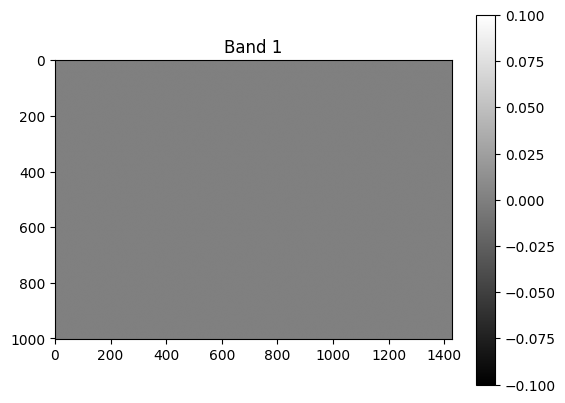

In [39]:
import rasterio
import matplotlib.pyplot as plt

lst_file = 'Lyon_LST_Landsat_2022-07-14_aligned.tif'
ndvi_file = 'Lyon_NDVI_Sentinel_2022-07-18_aligned.tif'
impervious_file = 'Lyon_Impervious_GHSL_2018-01-01_aligned.tif'
land_cover_file = 'Lyon_LandCover_ESA_2021-01-01_aligned.tif'

lst_path = os.path.join(output_dir, 'Aligned', lst_file)
ndvi_path = os.path.join(output_dir, 'Aligned', ndvi_file)
impervious_path = os.path.join(output_dir, 'Aligned', impervious_file)
land_cover_path = os.path.join(output_dir, 'Aligned', land_cover_file)



# Open the GeoTIFF
with rasterio.open(land_cover_path) as src:
    img = src.read(1)  # Read the first band

# Plot the image
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.title("Band 1")
plt.show()
